# Tri par selection

## Codage

Programmer la fonction suivante en Python

```
fonction indice_minimum(lst,i)
    n = longueur(lst)
    mini = lst[i]
    i_mini = i
    pour j allant de i à n - 1
        si lst[j] < mini
            mini = lst[j]
            i_mini = j
    renvoyer i_mini
```


In [1]:
def indice_minimum(lst : list, i : int) -> int:
    n = len(lst)
    mini = lst[i]
    i_mini = i
    for j in range(i,n):
        if lst[j] < mini:
            mini = lst[j]
            i_mini = j
    return i_mini


Exécuter la cellule de test suivante pour vérifier qu'il n'y a pas d'erreur de syntaxe (rien ne doit s'afficher)

In [2]:
indice_minimum([1,2,3,1,5,6],2)

3

Exécute maintenant cette cellule de test pour vérifier que ta fonction est correcte.

In [3]:
try:
    assert indice_minimum([1,2,4,65,5,4,8],1)==1
    assert indice_minimum([1,2,4,65,5,4,8],5)==5
except:
    print('Ta fonction est mal codée.')
else:
    print('Tout est OK, tu peux continuer.')

Tout est OK, tu peux continuer.


Programme la fonction suivante en Python

```
fonction tri_selection(lst)
    n = longueur(lst)
    pour i allant de 0 à n - 2
        p = indice_minimum(lst,i)
        échanger lst[p] et lst[i]
```

In [4]:
def tri_selection(lst):
    n = len(lst)
    for i in range(0,n-1):
        p = indice_minimum(lst,i)
        lst[i],lst[p]=lst[p],lst[i]

Exécute la cellule suivante pour dépister les éventuelles erreurs de syntaxe.

In [5]:
tri_selection([3,2,1])

Exécuter la cellule de test suivante pour vérifier.

In [6]:
from random import randint
L1 = [randint(0,100) for _ in range(10)]
print('Je choisis la liste \t\t',L1)
L2 = L1[:]
L2.sort()
print('En la triant on doit obtenir\t',L2)
tri_selection(L1)
print('Avec ta fonction on obtient\t',L1)
t = False
for (x,y) in zip(L1,L2):
    if x !=y:
        t = True
if t:
    print('Ta fonction est mal codée.')
else:
    print('Tout est OK, tu peux continuer.')

Je choisis la liste 		 [94, 9, 100, 30, 58, 78, 46, 26, 67, 77]
En la triant on doit obtenir	 [9, 26, 30, 46, 58, 67, 77, 78, 94, 100]
Avec ta fonction on obtient	 [9, 26, 30, 46, 58, 67, 77, 78, 94, 100]
Tout est OK, tu peux continuer.


## Complexité

tu vas maintenant rajouter une variable globale `opel` dans les 2 fonctions précédentes, que tu vas recopier ci dessous.
Tu l'augmenteras de 1 à chaque accès à `lst` en lecture/écriture.

**Ce que tu vas mesurer, c'est le nombre *réel* d'opels qui sont exécutées lors du tri d'une liste, pas le nombre dans le pire des cas**

Commençons par la fonction `indice_minimum`

In [7]:
nb_opel = 0 #on définit la variable
def indice_minimum(lst : list, i : int) -> int:
    global nb_opel
    n = len(lst)
    mini = lst[i]
    nb_opel+=1
    i_mini = i
    for j in range(i,n):
        nb_opel +=1
        if lst[j] < mini:
            mini = lst[j]
            nb_opel+=1
            i_mini = j
    return i_mini


Exécuter la cellule de test suivante pour vérifier.

In [8]:
try:
    nb_opel = 0
    indice_minimum([2,3,8,4,8,484,5,621,45],0)
    assert nb_opel == 10
except:
        print('Ta fonction est mal codée.')
else:
    print('Tout est OK, tu peux continuer.')

Tout est OK, tu peux continuer.


On passe la la fonction `tri_selection`

In [9]:
def tri_selection(lst):
    global nb_opel
    n = len(lst)
    for i in range(0,n-1):
        p = indice_minimum(lst,i)
        nb_opel += 2
        lst[i],lst[p]=lst[p],lst[i]

In [10]:
try:
    nb_opel = 0
    tri_selection([2,3,8,4,8,484,5,621,45])
    print(nb_opel)
    assert nb_opel == 73
except:
        print('Ta fonction est mal codée.')
else:
    print('Tout est OK, tu peux continuer.')

73
Tout est OK, tu peux continuer.


## Illustration des résultats

Contrairtement au résultat du cours, `nb_opel` n'est pas toujours automatiquement augmenté : on va obtenir des résultats *effectifs* et non des résultats *pire cas*.

Exécute la cellule suivante.

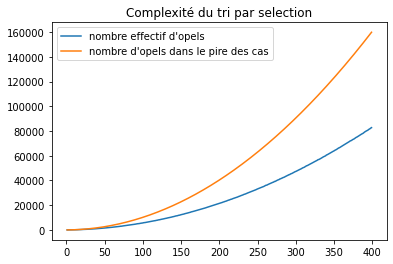

In [11]:
import matplotlib.pyplot as plt

X = []
Y = []
Z = []
for i in range(1,400):
    L = [randint(1,10000) for _ in range(i)]
    nb_opel = 0
    tri_selection(L)
    X.append(i)
    Y.append(nb_opel)
    Z.append(i**2+2*i-3)
plt.plot(X,Y,label = "nombre effectif d'opels")
plt.plot(X,Z,label = "nombre d'opels dans le pire des cas")
plt.title("Complexité du tri par selection")
plt.legend()
plt.show()

Comme on peut le voir, la complexité réelle semble bien de l'ordre de $n^2$.
On peut essayer de déterminer "à la main" le coefficient $a$ tel que la courbe bleu se rapproche le plus de la courbe de la fonction définie sur $\mathbb{N}^*$ par $$n\mapsto an^2$$
Il suffit d'essayer successivement des valeurs de $a$ :

Entrer une valeur de a : 0.5


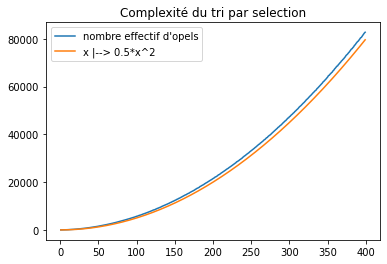

In [12]:
X = []
Y = []
Z = []
a = float(input("Entrer une valeur de a : "))
for i in range(1,400):
    L = [randint(1,10000) for _ in range(i)]
    nb_opel = 0
    tri_selection(L)
    X.append(i)
    Y.append(nb_opel)
    Z.append(a*i**2)
plt.plot(X,Y,label = "nombre effectif d'opels")
plt.plot(X,Z,label = "x |--> "+str(a)+"*x^2")
plt.title("Complexité du tri par selection")
plt.legend()
plt.show()

Si on se réfère aux résultats que tu as trouvés, pour une liste de taille 100000, combien faut-il d'opels environ pour la trier avec le tri par selection ?
Fais le calcul dans la cellule suivante.

In [13]:
0.5*(100000)**2

5000000000.0